#  Party words!

In [1]:
import pandas as pd
import numpy as np

In [2]:
two_party_words = pd.read_csv("../data/two.csv")
two_party_words.head()

,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,district_x,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Rep,Robert,B.,Aderholt,NaN,NaN,R,AL,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,Junior Seat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Sen,Wayne,A.,Allard,NaN,NaN,R,CO,Senior Seat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

#make it so that we only show first 4 decimals for floats
np.set_printoptions(precision=4,suppress=True)

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
party_dummies = pd.get_dummies(two_party_words.party_x).astype(int)
party_dummies = party_dummies[["R"]]
party_dummies.head()
capitol_words = party_dummies.merge(two_party_words, right_index=True, left_index=True)

#del capitol_words['Unnamed: 0']
capitol_words.head()

,R,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0,0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,Rep,Robert,B.,Aderholt,NaN,NaN,R,AL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,Sen,Wayne,A.,Allard,NaN,NaN,R,CO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Histgram for words
Must of my histograms will look in this razy way because I'm delaing with a sparse matrix. So a lot of this words are not mentioned a lot. There is not one word that is mentioned consitently by more than 40% percent of the people as their top word.

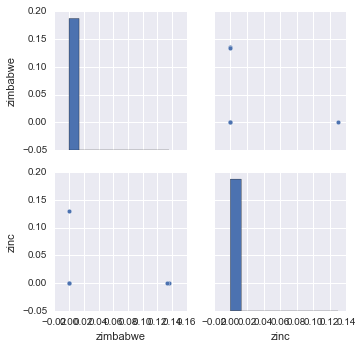

In [5]:
sns.pairplot(capitol_words[["zimbabwe","zinc"]])

In [6]:
word_columns = capitol_words.columns[807:]
capitol_words[word_columns]
capitol_words.R.head()
X_words = capitol_words[word_columns]
y_words = capitol_words["R"]
X_train,X_test,y_train,y_test = train_test_split(X_words,y_words,test_size=0.4)

from sklearn.tree import DecisionTreeClassifier
words_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
words_tree.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [7]:
words_tree.feature_importances_
features = pd.DataFrame({'feature':word_columns, 'importance':words_tree.feature_importances_}).sort_values(by='importance',ascending=False)

In [8]:
features.head()

,feature,importance
10506,requesting,0.472055
11636,spending,0.305775
6575,iraq,0.163342
12031,surpluses,0.058828
9097,overhead,0.000000


In [9]:
print capitol_words.columns[15:]
capitol_words.crp_id
capitol_words.ix[:,:25].head()

Index([u'website_x', u'webform', u'congress_office', u'bioguide_id',
       u'votesmart_id', u'fec_id', u'govtrack_id', u'crp_id', u'twitter_id',
       u'congresspedia_url',
       ...
       u'ziegler', u'zimbabwe', u'zimmer', u'zinc', u'zion', u'zoberman',
       u'zone', u'zones', u'zoo', u'zuni'],
      dtype='object', length=14436)


,R,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,...,website_x,webform,congress_office,bioguide_id,votesmart_id,fec_id,govtrack_id,crp_id,twitter_id,congresspedia_url
0,0,0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,...,http://www.house.gov/abercrombie,NaN,NaN,A000014,26827.0,H6HI01121,400001,N00007665,neilabercrombie,http://www.opencongress.org/wiki/Neil_Abercrombie
1,0,1,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,...,http://ackerman.house.gov/,http://www.house.gov/writerep,2111 Rayburn House Office Building,A000022,26970.0,H4NY07011,400003,N00001143,repgaryackerman,http://www.opencongress.org/wiki/Gary_Ackerman
2,1,2,Rep,Robert,B.,Aderholt,NaN,NaN,R,AL,...,https://aderholt.house.gov,http://aderholt.house.gov/email-me2/,235 Cannon House Office Building,A000055,441.0,H6AL04098,400004,N00003028,Robert_Aderholt,http://www.opencongress.org/wiki/Robert_Aderholt
3,0,3,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,...,http://akaka.senate.gov,http://www.akaka.senate.gov/email-senator-akak...,141 Hart Senate Office Building,A000069,53286.0,S0HI00084,300001,N00007653,NaN,http://www.opencongress.org/wiki/Daniel_Akaka
4,1,4,Sen,Wayne,A.,Allard,NaN,NaN,R,CO,...,http://allard.senate.gov,NaN,NaN,A000109,26783.0,S6CO00168,300003,N00009082,NaN,http://www.opencongress.org/wiki/Wayne_Allard


# Find method:
Small mask method to make my life easier:

In [10]:
def my_mask(df,column,condition,value):
    new_data = []
    if condition == "==":
        new_data = df[df[column] == value]
    elif condition == "<=":
        new_data = df[df[column] <= value]
    elif condition == "!=":
        new_data = df[df[column] != value]
    elif condition == ">=":
        new_data = df[df[column] >= value]
    elif condition == ">":
        new_data = df[df[column] > value]
    elif condition == "<":
        new_data = df[df[column] < value]
    else:
        print "arguments needed-column,condition,value-:"
    return new_data    

In [11]:
my_first_mask = my_mask(capitol_words,"firstname","==","Neil")

In [12]:
def subset(df,column):
    dict = {}
    subs = df[column].unique()  
    for element in subs:
         dict[element] = my_mask(df,column,"==",element)
    print "New available dictionary of dataframes is:\n subsets_of ",subs 
    return dict        

In [13]:
states = subset(capitol_words,"state_x")
states['AK'].head()
parties = subset(capitol_words, "party_x")
parties['D'].head()

New available dictionary of dataframes is:
 subsets_of  ['HI' 'NY' 'AL' 'CO' 'NJ' 'ME' 'MO' 'TN' 'LA' 'PA' 'OH' 'FL' 'MI' 'NH' 'NC'
 'MD' 'TX' 'MT' 'CA' 'UT' 'AR' 'DE' 'NM' 'GA' 'OR' 'IA' 'VA' 'KS' 'KY' 'IN'
 'WV' 'WA' 'WI' 'NV' 'IL' 'SC' 'GU' 'OK' 'MN' 'WY' 'AK' 'MA' 'ND' 'CT' 'VI'
 'MS' 'ID' 'RI' 'AS' 'AZ' 'NE' 'PR' 'SD' 'VT' 'DC']
New available dictionary of dataframes is:
 subsets_of  ['D' 'R']


,R,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0,0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,5,Rep,Robert,E.,Andrews,NaN,Rob,D,NJ,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,6,Rep,Thomas,H.,Allen,NaN,Tom,D,ME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
str(my_first_mask)

globals()[capitol_words.state_x.unique()[0]+"lala"] = {}
print capitol_words.state_x.unique()[1]
globals()['variable{}'.format(capitol_words.state_x.unique()[1])] = 0


NY


In [18]:
def clean_sparse_irrelevant(pd):
    cols = pd.columns
    deleted=0
    for c in cols:
        x=pd[c]
        if x.dtype=="float64":
            if x.sum()==0:
                del pd[c]
                deleted = deleted +1
    print "DELETED:",deleted
    return pd


In [19]:
clean_sparse_irrelevant(states['AK'])

DELETED: 0


,R,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,...,veterans,village,villages,water,whaling,wilderness,wildlife,wind,yeas,youth
82,0,86,Sen,Mark,NaN,Begich,NaN,NaN,D,AK,...,0.051424,0.091710,0.124813,0.000000,0.000000,0.000000,0.074392,0.000000,0.000000,0.000000
472,1,559,Sen,Lisa,A.,Murkowski,NaN,NaN,R,AK,...,0.000000,0.095305,0.129706,0.068622,0.000000,0.085929,0.077309,0.085929,0.000000,0.090092
628,1,750,Sen,Ted,F.,Stevens,NaN,NaN,R,AK,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.089775,0.080769,0.000000,0.106864,0.000000
753,1,889,Rep,Don,E.,Young,NaN,NaN,R,AK,...,0.000000,0.000000,0.000000,0.000000,0.124897,0.082743,0.074442,0.000000,0.000000,0.000000


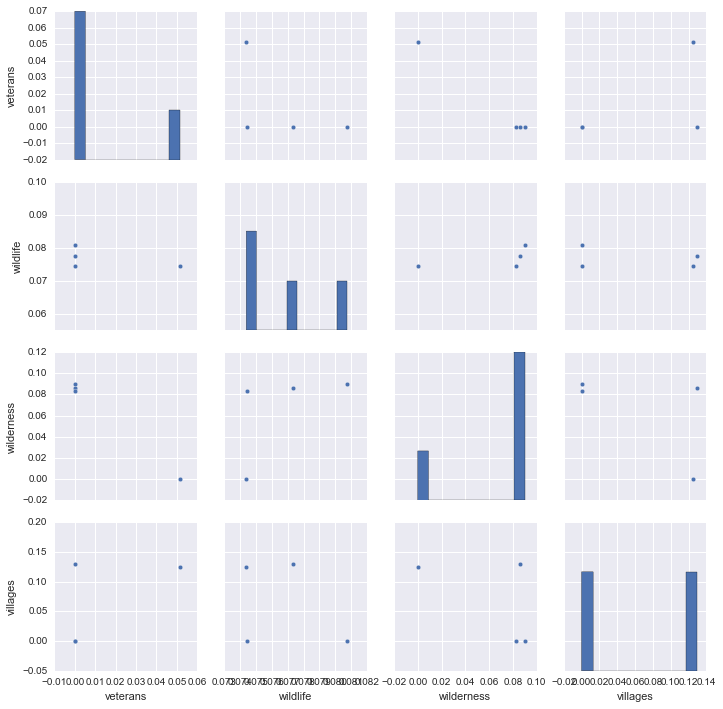

In [17]:
sns.pairplot(states['AK'][["veterans","wildlife","wilderness","villages"]])